# Hand Written Digit Recognition
Project by:
*   Hamza Zaidi     2022379

Data Science




In [ ]:
#Importing Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Normalize pixel values to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
# Add channel dimension to input images (required for convolutional layers)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)


In [ ]:
# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [ ]:
# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
# Bidirectional LSTM model for feature extraction
lstm_model = models.Sequential([
    layers.Bidirectional(layers.LSTM(128, return_sequences=True), input_shape=(28, 28)),
    layers.Bidirectional(layers.LSTM(64)),
])

In [ ]:
# GRU model for classification
gru_model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(128,)),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

# Stack the models
combined_model = models.Sequential([
    lstm_model,
    gru_model
])

In [ ]:
# Compile the combined model
combined_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Evaluate the combined model
test_loss, test_acc = combined_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

313/313 [==============================] - 6s 5ms/step - loss: 0.0997 - accuracy: 0.9708
Test Accuracy: 0.97079998254776


In [ ]:
# Train the hybrid/ensemble model
history = combined_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), verbose=1)

# Evaluate the model's performance
y_pred = combined_model.predict(X_test)

# Convert one-hot encoded predictions and true labels back to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Compute evaluation metrics
accuracy = accuracy_score(y_true_labels, y_pred_labels)
precision = precision_score(y_true_labels, y_pred_labels, average='macro')
recall = recall_score(y_true_labels, y_pred_labels, average='macro')
f1 = f1_score(y_true_labels, y_pred_labels, average='macro')
roc_auc = roc_auc_score(y_test, y_pred, average='macro', multi_class='ovr')

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'AUC-ROC: {roc_auc}')

Epoch 1/10
844/844 [==============================] - 12s 14ms/step - loss: 0.0046 - accuracy: 0.9986 - val_loss: 0.0554 - val_accuracy: 0.9905
Epoch 2/10
844/844 [==============================] - 10s 11ms/step - loss: 0.0058 - accuracy: 0.9983 - val_loss: 0.0652 - val_accuracy: 0.9888
Epoch 3/10
844/844 [==============================] - 9s 11ms/step - loss: 0.0050 - accuracy: 0.9984 - val_loss: 0.0464 - val_accuracy: 0.9912
Epoch 4/10
844/844 [==============================] - 9s 11ms/step - loss: 0.0058 - accuracy: 0.9982 - val_loss: 0.0474 - val_accuracy: 0.9907
Epoch 5/10
844/844 [==============================] - 10s 12ms/step - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.0599 - val_accuracy: 0.9892
Epoch 6/10
844/844 [==============================] - 10s 12ms/step - loss: 0.0068 - accuracy: 0.9981 - val_loss: 0.0434 - val_accuracy: 0.9923
Epoch 7/10
844/844 [==============================] - 10s 12ms/step - loss: 0.0035 - accuracy: 0.9991 - val_loss: 0.0452 - val_accuracy: 0

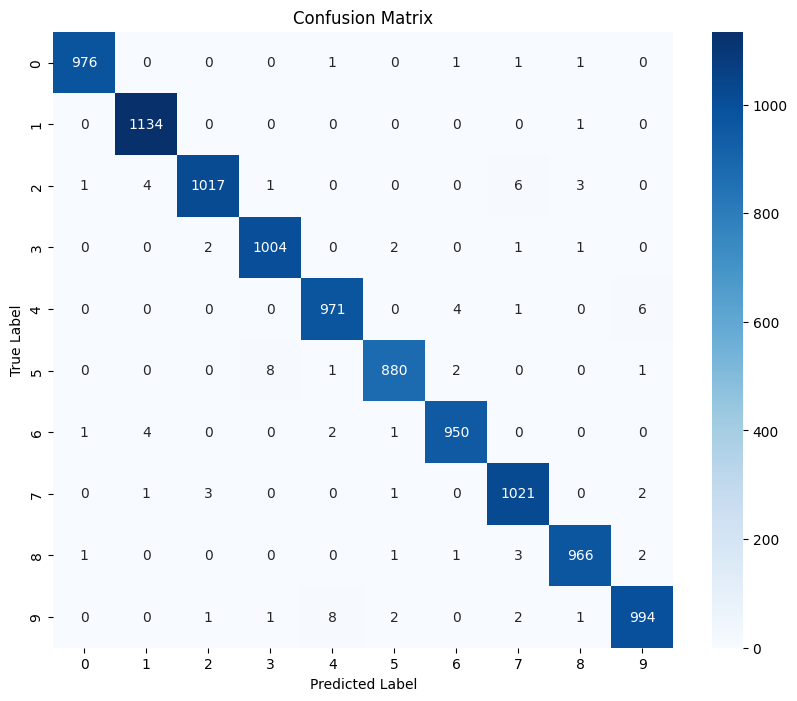

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


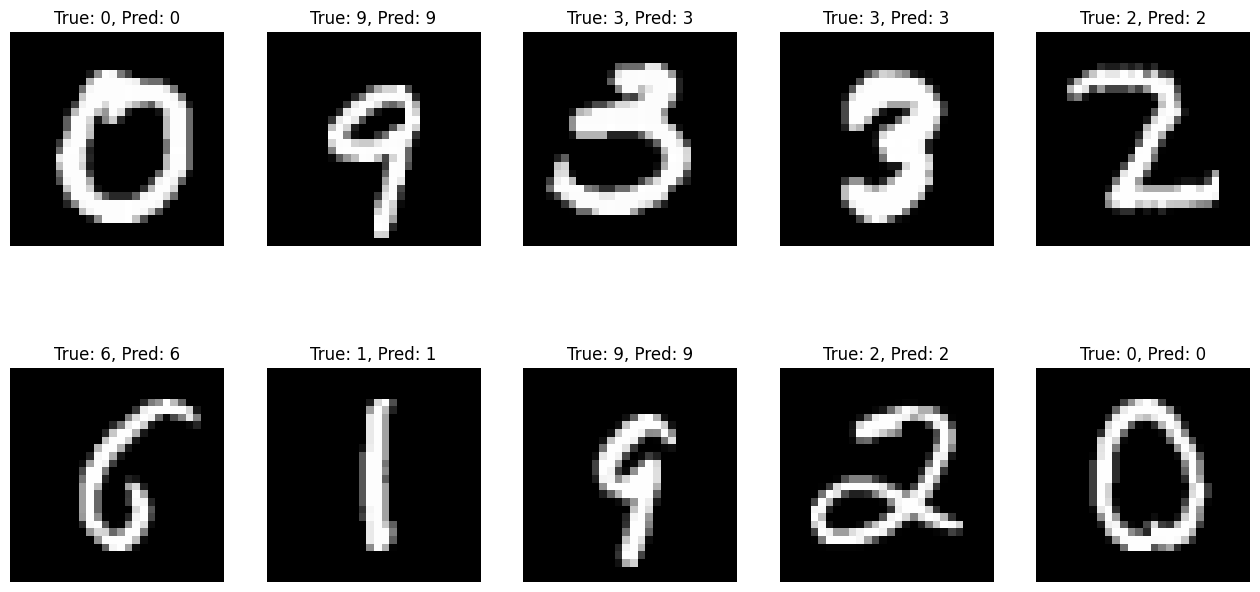

In [ ]:
# Plot a random sample of test images along with their true and predicted labels
plt.figure(figsize=(16, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    index = np.random.randint(0, len(X_test))
    plt.imshow(X_test[index][:, :, 0], cmap='gray')
    plt.title(f'True: {y_true_labels[index]}, Pred: {y_pred_labels[index]}')
    plt.axis('off')
plt.show()

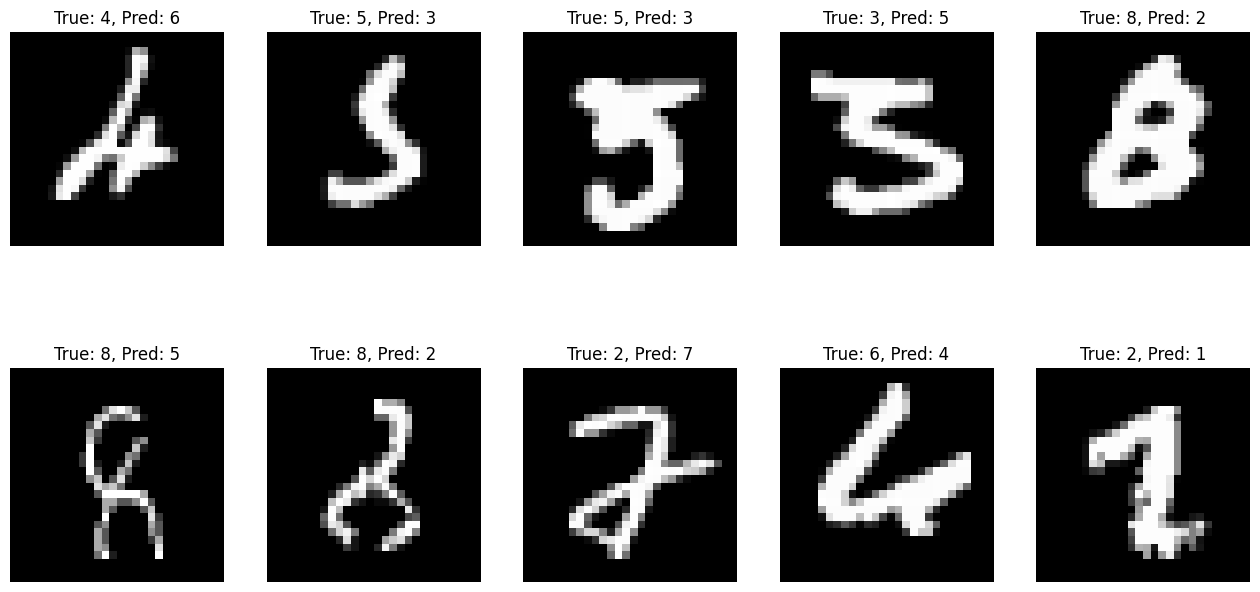

In [ ]:
# Plot misclassified samples
misclassified_idx = np.where(y_pred_labels != y_true_labels)[0]
plt.figure(figsize=(16, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    idx = misclassified_idx[i]
    plt.imshow(X_test[idx][:, :, 0], cmap='gray')
    plt.title(f'True: {y_true_labels[idx]}, Pred: {y_pred_labels[idx]}')
    plt.axis('off')
plt.show()


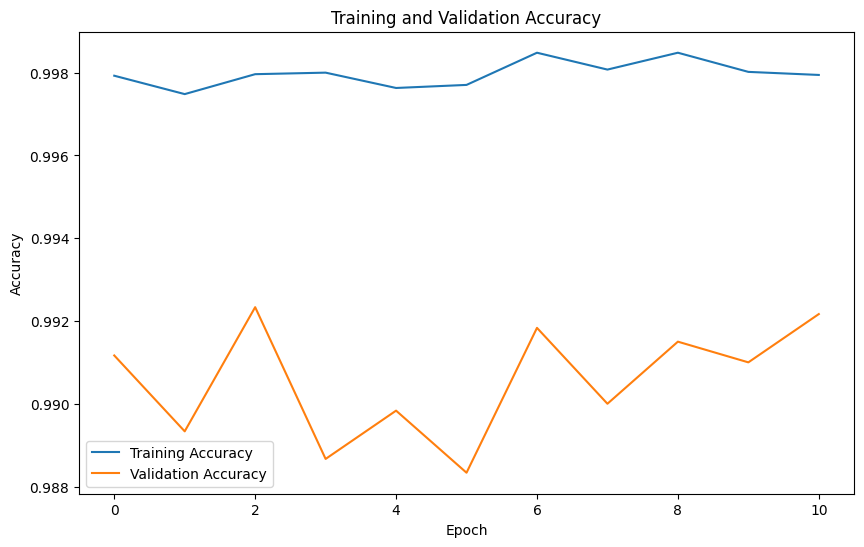

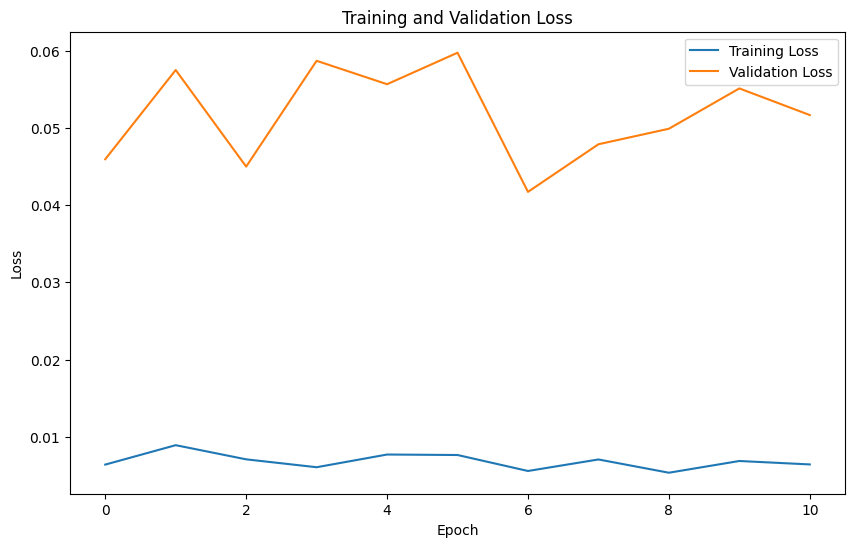

In [ ]:
# Plot learning curves for training and validation
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
